# 4MLSP - Projet 

## 1- Chargement des datasets

In [1]:
import pandas as pd

df_mat = pd.read_csv("student-mat.csv", sep=None,engine='python')
df_por = pd.read_csv("student-por.csv", sep=None,engine='python')

## 2- Rajout de la variable catégorique binaire "finalResult" aux datasets

In [2]:
df_mat['finalResult'] = pd.cut(df_mat.G3,bins=[-1,9,20],labels=['fail','pass'])
df_por['finalResult'] = pd.cut(df_por.G3,bins=[-1,9,20],labels=['fail','pass'])

## 3- Rajout de la variable catégorique "academicGrade" aux datasets

In [3]:
df_mat['academicGrade'] = pd.cut(df_mat.G3,bins=[-1,9,11,13,15,20],labels=['E','D','C','B','A'])
df_por['academicGrade'] = pd.cut(df_por.G3,bins=[-1,9,11,13,15,20],labels=['E','D','C','B','A'])

## 4- Analyse exploratoire complète

In [4]:
df_mat.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  goout Dalc  Walc  health  absences  G1  G2  G3 finalResult academicGrade  
0     4    1     1       3         6   5   6   6        fail             E  
1     3    1     1       3         4   5   5   6        fail             E  
2     2    2     3       3        10   7   8  10        pass             D  
3     2    1     1       5         2  15  14  15        pass             B  
4     2    1     2       5         4   6  10  10        pass             D  

[5 rows x 35 columns]

In [5]:
df_por.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  goout Dalc  Walc  health  absences  G1  G2  G3 finalResult academicGrade  
0     4    1     1       3         4   0  11  11        pass             D  
1     3    1     1       3         2   9  11  11        pass             D  
2     2    2     3       3         6  12  13  12        pass             C  
3     2    1     1       5         0  14  14  14        pass             B  
4     2    1     2       5         0  11  13  13        pass             C  

[5 rows x 35 columns]

### Functions and imports

In [6]:
### Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py
import random
import warnings
warnings.filterwarnings('ignore')

# Functions
def catPlot(dataset,field,title):
    sns.catplot(x=field, kind="count",palette="magma", data=dataset)
    plt.title(title)
    
def catPlotHue(dataset,field,title):
    sns.catplot(x=field[0], kind="count",hue =field[1],palette="brg", data=dataset)
    plt.title(title)

def plotlyPie(dataset,field,title):
    cells = dataset[field].value_counts()
    labels = (np.array(cells.index))
    sizes = (np.array((cells / cells.sum())*100))
    trace = go.Pie(labels=labels, values=sizes)
    layout = go.Layout(title=title)
    fig = go.Figure(data=trace, layout=layout)
    py.iplot(fig, filename=field)
    
def catPie(dataset,field,labels,title):
    new_field = field+"_temp"
    dataset[new_field] = np.nan
    df = [dataset]
    for col in df:
        col.loc[col[field] == 1 , new_field] = labels[0]
        col.loc[col[field] == 2 , new_field] = labels[1]
        col.loc[col[field] == 3 , new_field] = labels[2]
        col.loc[col[field] == 4 , new_field] = labels[3]  
    amount = dataset[new_field].value_counts().tolist()
    colors = ["red", "yellow", "blue", "green"]

    trace = go.Pie(labels=labels, values=amount,
                   hoverinfo='label+percent', textinfo='value', 
                   textfont=dict(size=20),
                   marker=dict(colors=colors, 
                   line=dict(color='#000000', width=1)))
    layout = go.Layout(title=title)
    fig = go.Figure(data=trace, layout=layout)
    py.iplot(fig, filename='pie')

def boxPlot(dataset,field,title):
    palettes=["summer","winter","rainbow"]
    plt.figure(figsize=(18,7))
    plt.title(title)
    sns.boxplot(y=field[0], x=field[1], data = dataset , orient="h", palette = palettes[random.randint(0,len(palettes)-1)])

def distPlot(dataset,field,title):
    conditions = dataset[field[0]].unique().tolist()
    if(len(conditions)==5):
        conditions=[min(conditions),max(conditions)]
    for i in range(len(conditions)):
        figure= plt.figure(figsize=(17,5))
        ax=figure.add_subplot(121)        
        sns.distplot(
            dataset[(dataset[field[0]] == conditions[i])][field[1]],
            color=(random.random(),random.random(),random.random()),
            ax=ax
        )
        ax.set_title(title + str(conditions[i]))

def catPie1to5(dataset,field,title):
    colors = ["red", "yellow", "blue", "green","brown"]
    labels = dataset[field].unique().tolist()
    amount = dataset[field].value_counts().tolist()
    trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1)))
    layout = go.Layout(title=title+" (from low - 1 to high - 5)")
    fig = go.Figure(data=trace, layout=layout)
    py.iplot(fig, filename = field)

### Gender of students

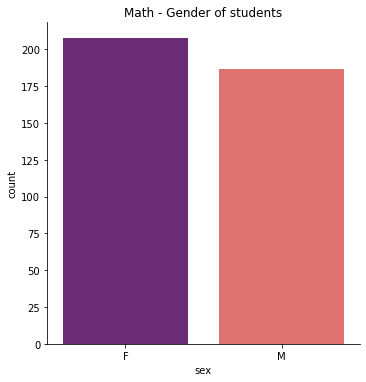

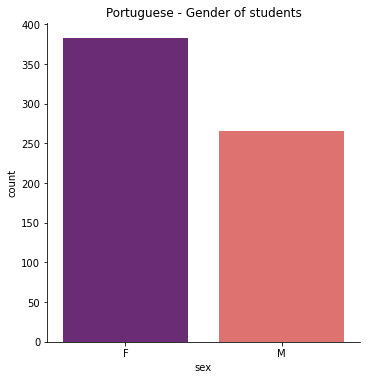

In [7]:
# Gender of students
catPlot(df_mat,"sex","Math - Gender of students")
catPlot(df_por,"sex","Portuguese - Gender of students")

### Age of students

In [8]:
# Age of students
plotlyPie(df_mat,"age","Math - Age of students")
plotlyPie(df_por,"age","Portuguese - Age of students")

### Study time

In [9]:
labels=['< 2 hours','2 to 5 hours','5 to 10 hours','> 10 hours']
catPie(df_mat,"studytime",labels,"Math - Study time")
catPie(df_por,"studytime",labels,"Portuguese - Study time")

### Study time and final grades

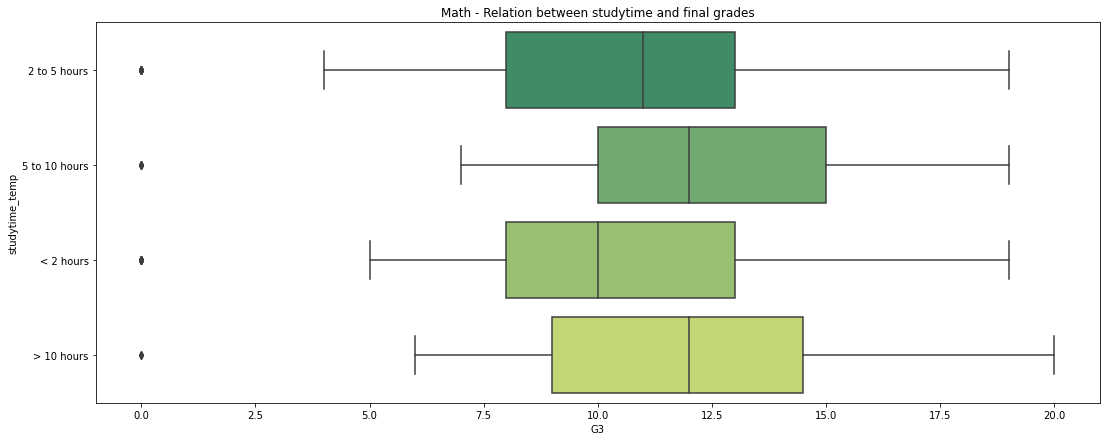

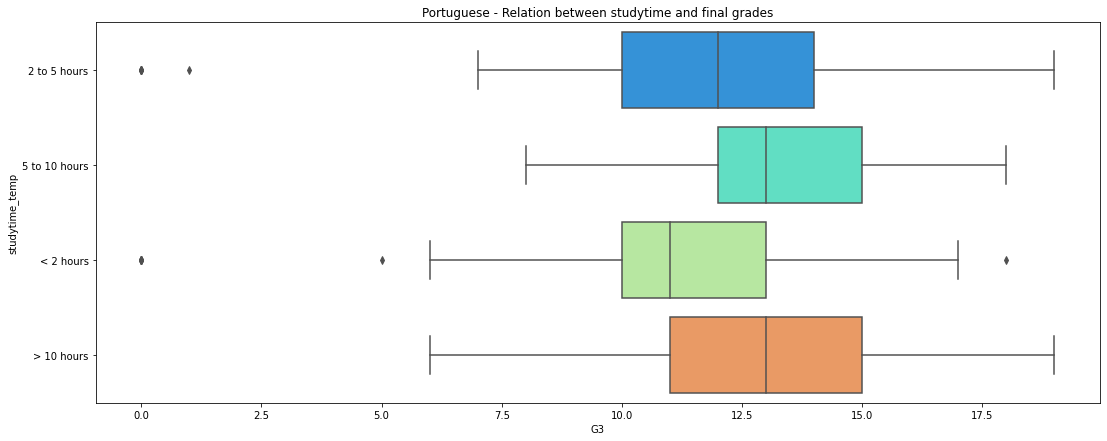

In [10]:
boxPlot(df_mat,['studytime_temp','G3'],'Math - Relation between studytime and final grades')
boxPlot(df_por,['studytime_temp','G3'],'Portuguese - Relation between studytime and final grades')

### Travel time of students and their address:

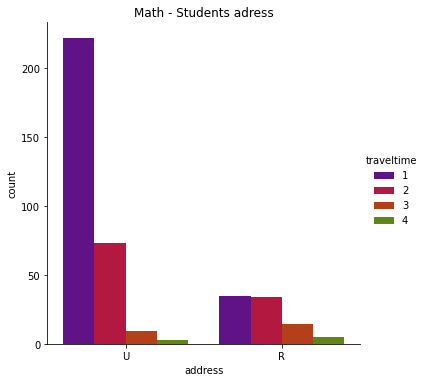

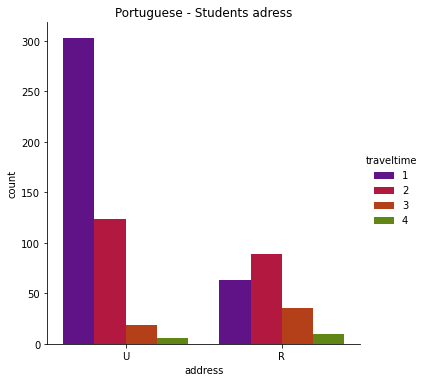

In [11]:
catPlotHue(df_mat,['address','traveltime'],'Math - Students adress')
catPlotHue(df_por,['address','traveltime'],'Portuguese - Students adress')

### Distribution of absences for students which lives in Urban / Rural

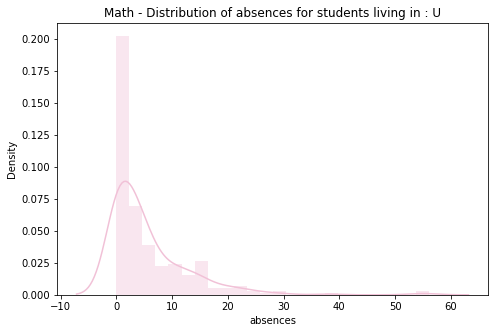

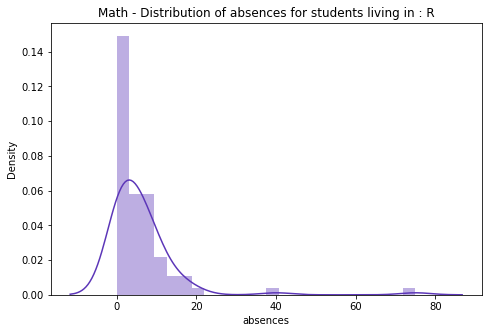

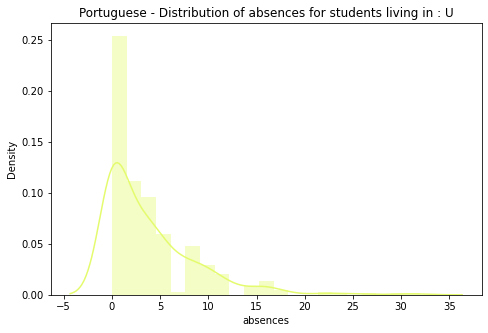

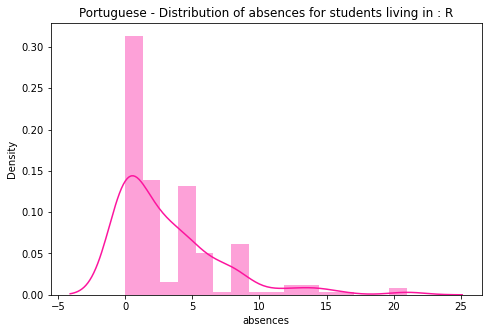

In [12]:
distPlot(df_mat,["address","absences"],"Math - Distribution of absences for students living in : ")
distPlot(df_por,["address","absences"],"Portuguese - Distribution of absences for students living in : ")

### Number of students in a relationship

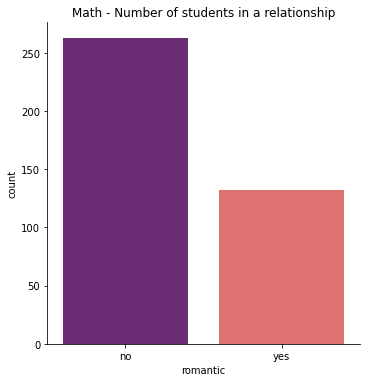

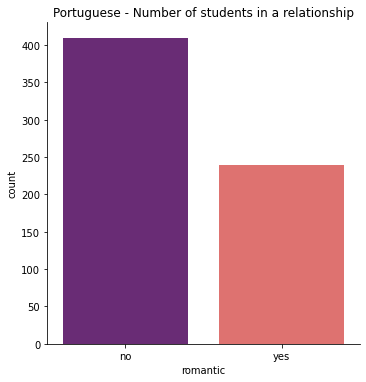

In [13]:
catPlot(df_mat,"romantic","Math - Number of students in a relationship")
catPlot(df_por,"romantic","Portuguese - Number of students in a relationship")

### Distribution of absences for students in love

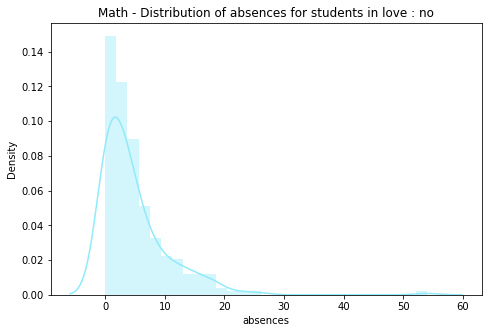

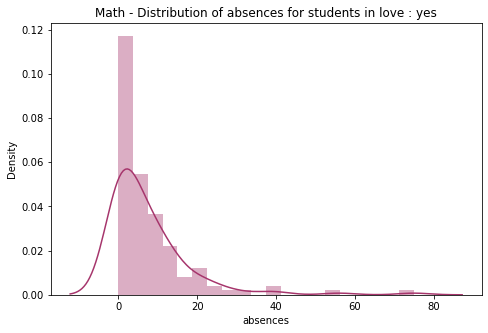

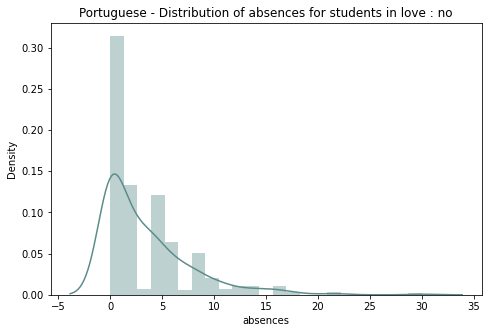

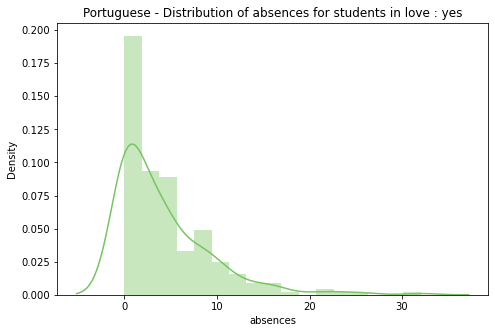

In [14]:
distPlot(df_mat,["romantic","absences"],"Math - Distribution of absences for students in love : ")
distPlot(df_por,["romantic","absences"],"Portuguese - Distribution of absences for students in love : ")

### Distribution of final grades for students in love

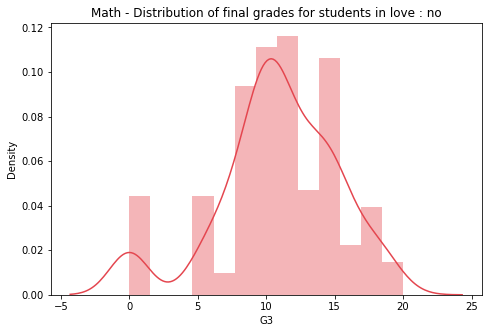

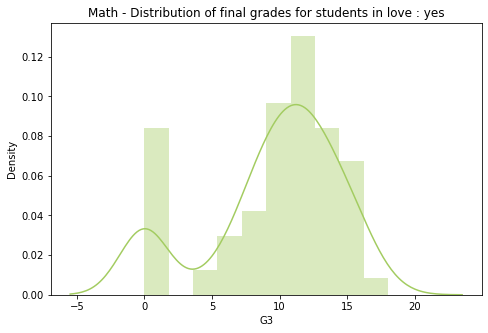

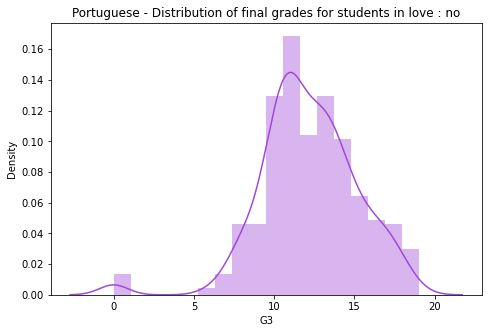

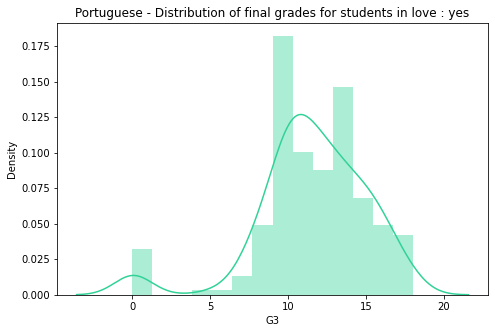

In [15]:
distPlot(df_mat,["romantic","G3"],"Math - Distribution of final grades for students in love : ")
distPlot(df_por,["romantic","G3"],"Portuguese - Distribution of final grades for students in love : ")

### Current health status

In [16]:
catPie1to5(df_mat,"health","Math - Current healt status")
catPie1to5(df_por,"health","Portuguese - Current healt status")

### Health status and effects on final grades

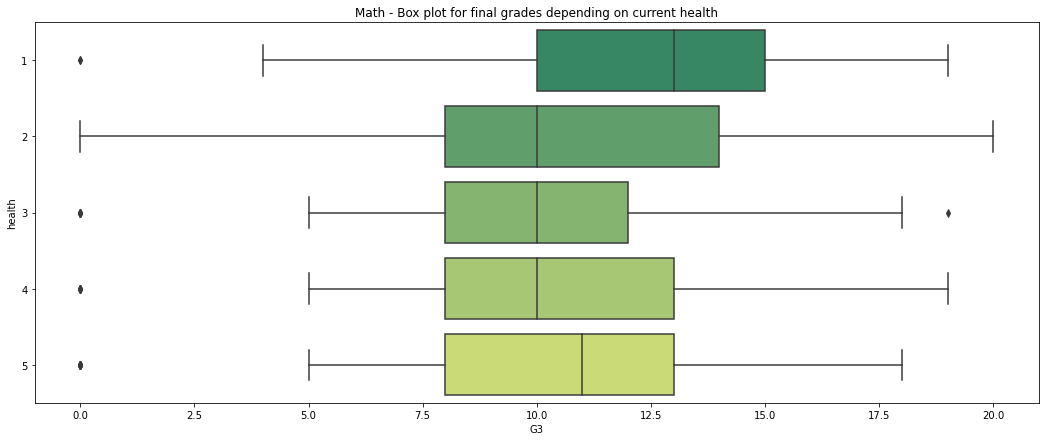

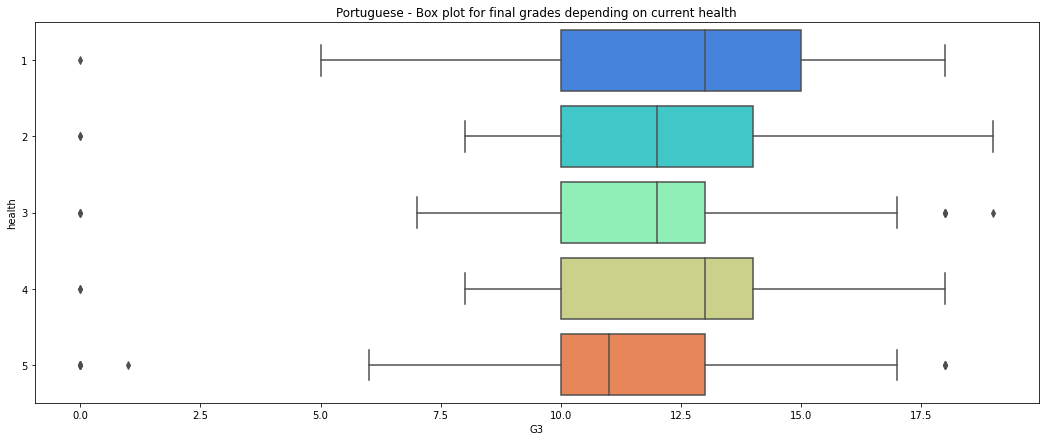

In [17]:
boxPlot(df_mat,['health','G3'],'Math - Box plot for final grades depending on current health')
boxPlot(df_por,['health','G3'],'Portuguese - Box plot for final grades depending on current health')

### Health status and effects on absences

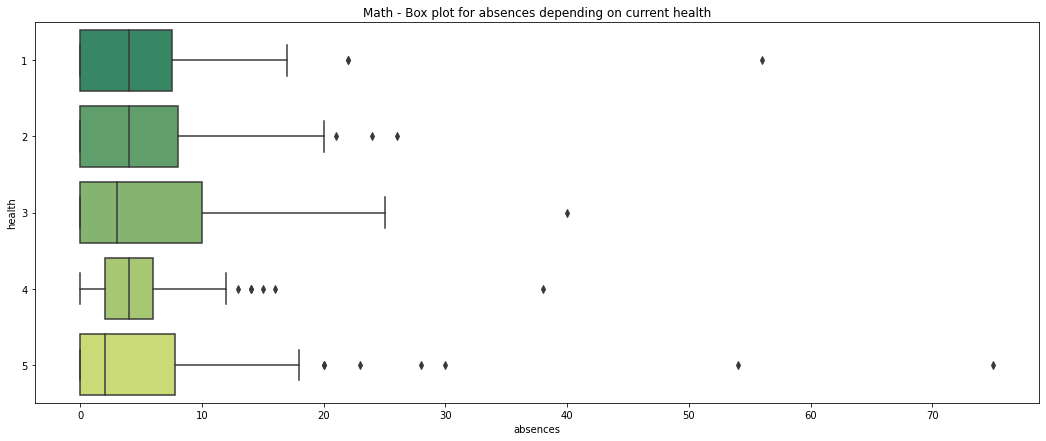

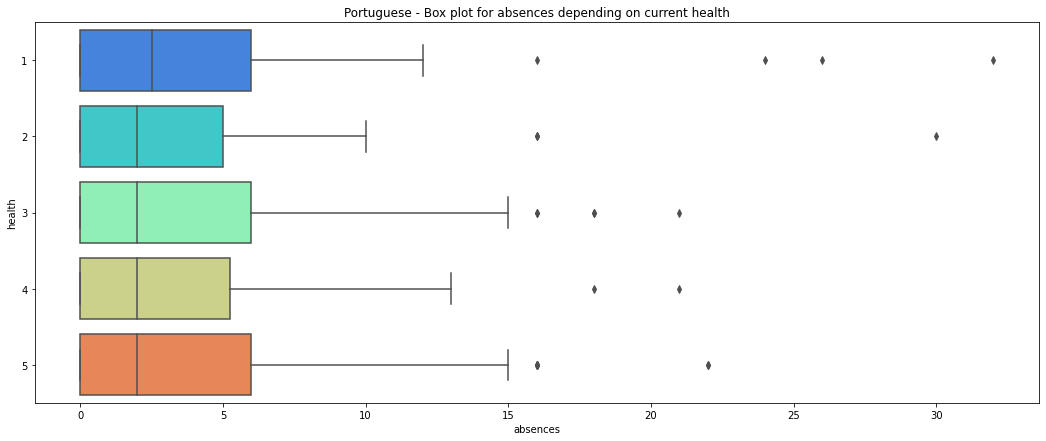

In [18]:
boxPlot(df_mat,['health','absences'],'Math - Box plot for absences depending on current health')
boxPlot(df_por,['health','absences'],'Portuguese - Box plot for absences depending on current health')


### Alcohol comsumption of students on workday

In [19]:
catPie1to5(df_mat,"Dalc","Workday alcohol consumption")
catPie1to5(df_por,"Dalc","Workday alcohol consumption")

### Distribution of absences for students who drinks on workday

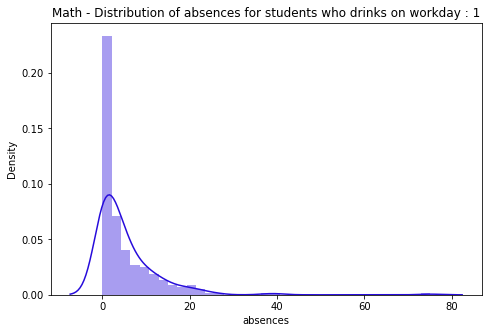

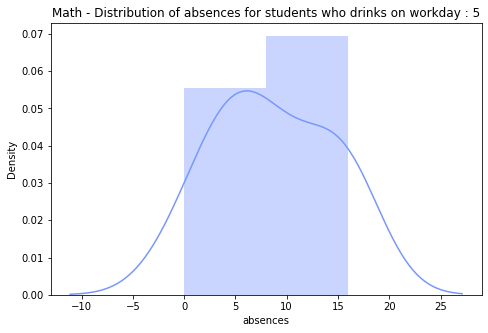

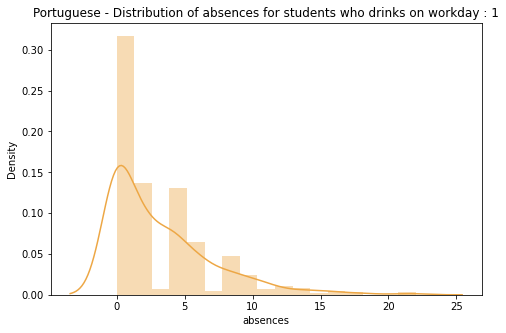

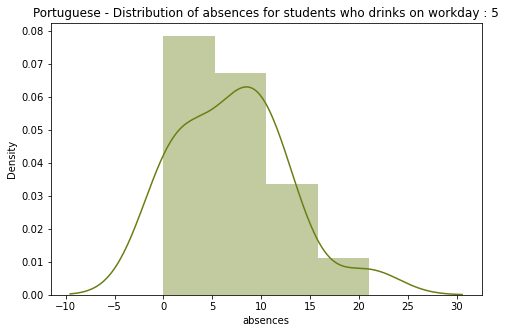

In [20]:
distPlot(df_mat,["Dalc","absences"],"Math - Distribution of absences for students who drinks on workday : ")
distPlot(df_por,["Dalc","absences"],"Portuguese - Distribution of absences for students who drinks on workday : ")

### Distribution of grades for students who drinks on workday

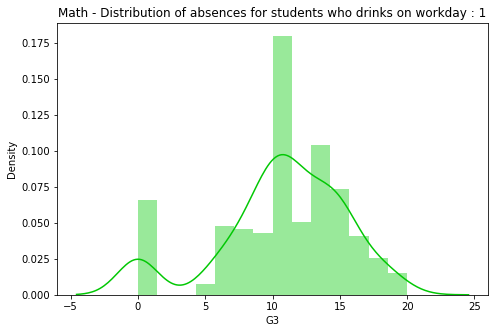

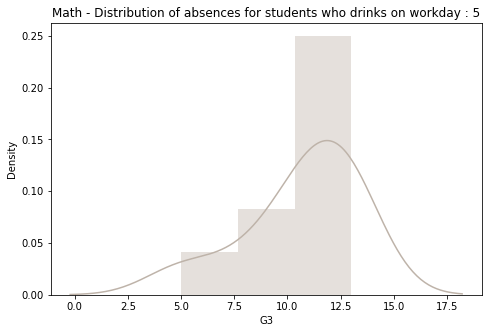

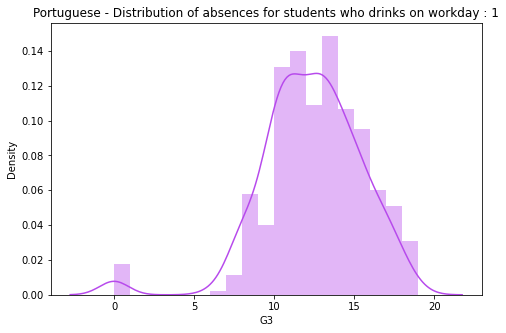

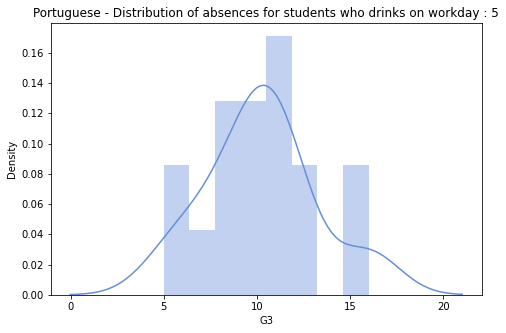

In [21]:
distPlot(df_mat,["Dalc","G3"],"Math - Distribution of absences for students who drinks on workday : ")
distPlot(df_por,["Dalc","G3"],"Portuguese - Distribution of absences for students who drinks on workday : ")

### Alcohol comsumption of students on weekend

In [22]:
catPie1to5(df_mat,"Walc","Weekend alcohol consumption")
catPie1to5(df_por,"Walc","Weekend alcohol consumption")

### Distribution of absences for students who drinks on weekend

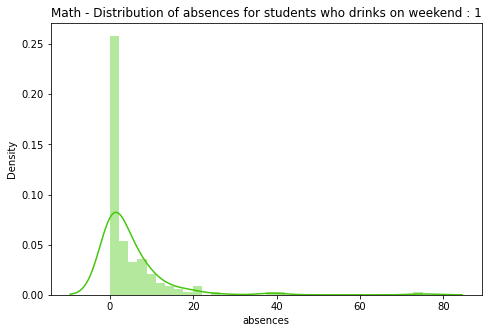

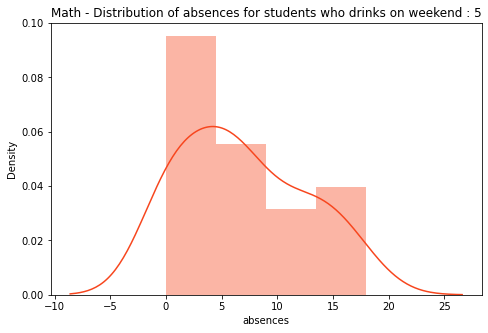

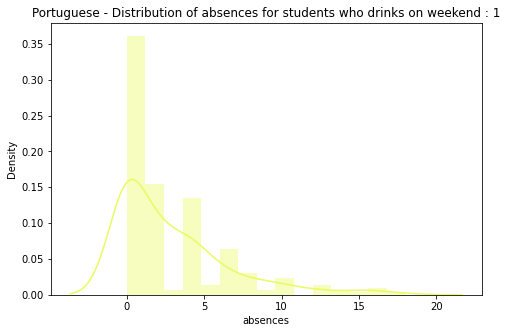

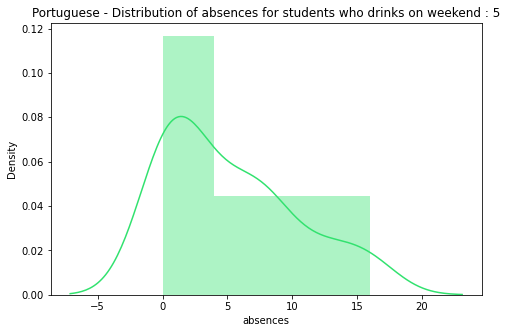

In [23]:
distPlot(df_mat,["Walc","absences"],"Math - Distribution of absences for students who drinks on weekend : ")
distPlot(df_por,["Walc","absences"],"Portuguese - Distribution of absences for students who drinks on weekend : ")

### Distribution of grades for students who drinks on weekend

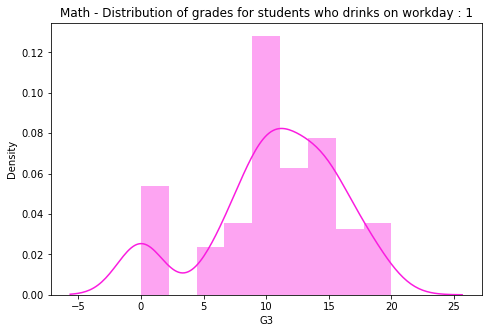

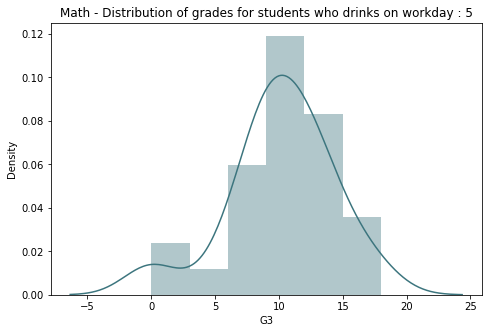

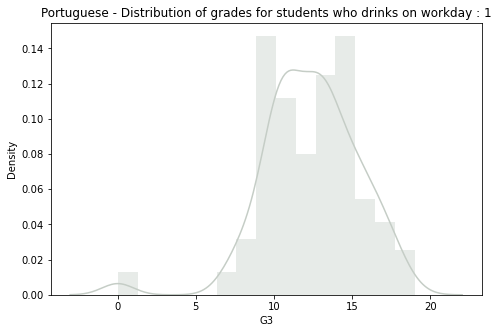

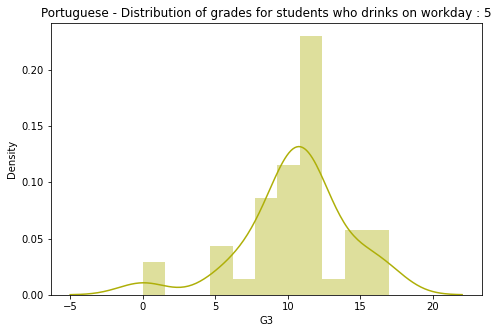

In [24]:
distPlot(df_mat,["Walc","G3"],"Math - Distribution of grades for students who drinks on workday : ")
distPlot(df_por,["Walc","G3"],"Portuguese - Distribution of grades for students who drinks on workday : ")

### How many students have extra paid class ?

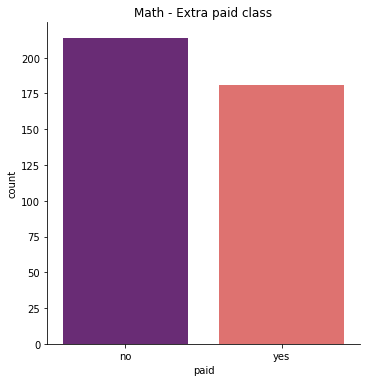

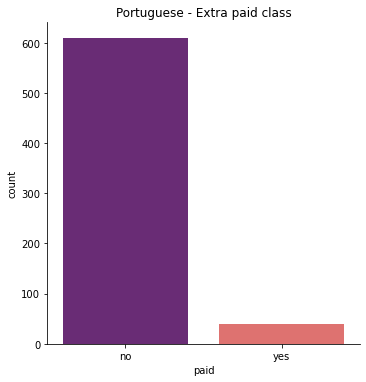

In [25]:
catPlot(df_mat,"paid","Math - Extra paid class")
catPlot(df_por,"paid","Portuguese - Extra paid class")

### Distribution of grades for students who have extra paid class

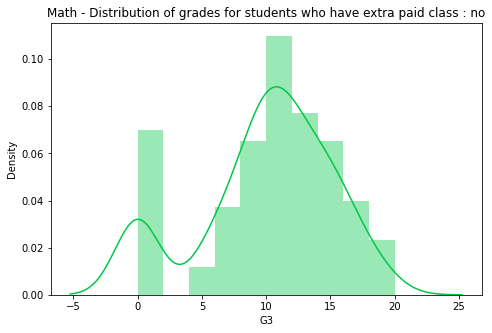

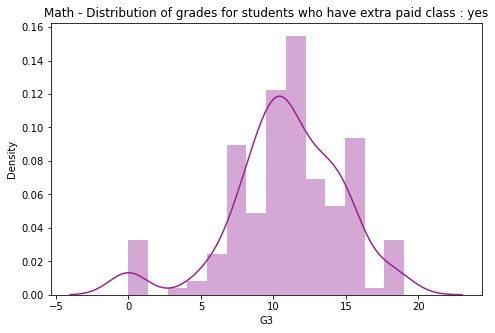

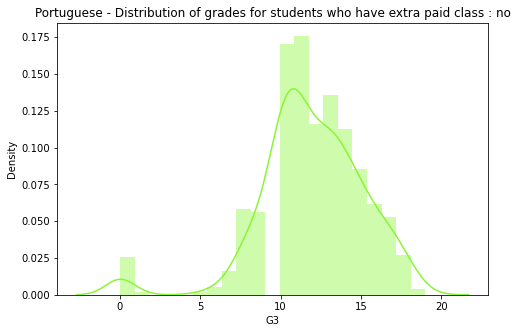

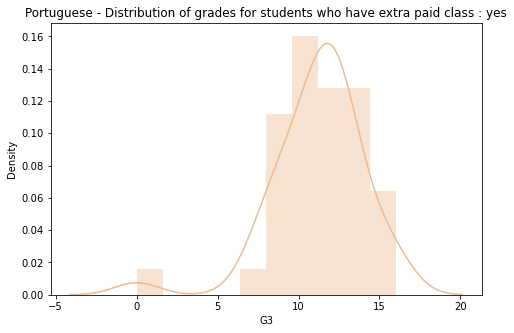

In [26]:
distPlot(df_mat,["paid","G3"],"Math - Distribution of grades for students who have extra paid class : ")
distPlot(df_por,["paid","G3"],"Portuguese - Distribution of grades for students who have extra paid class : ")

### Boxplot Distribution of grades for students who have extra paid class 

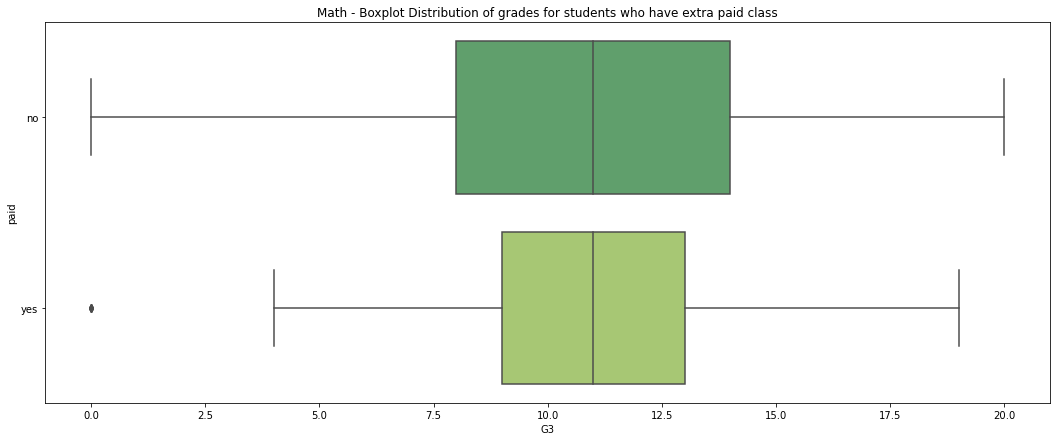

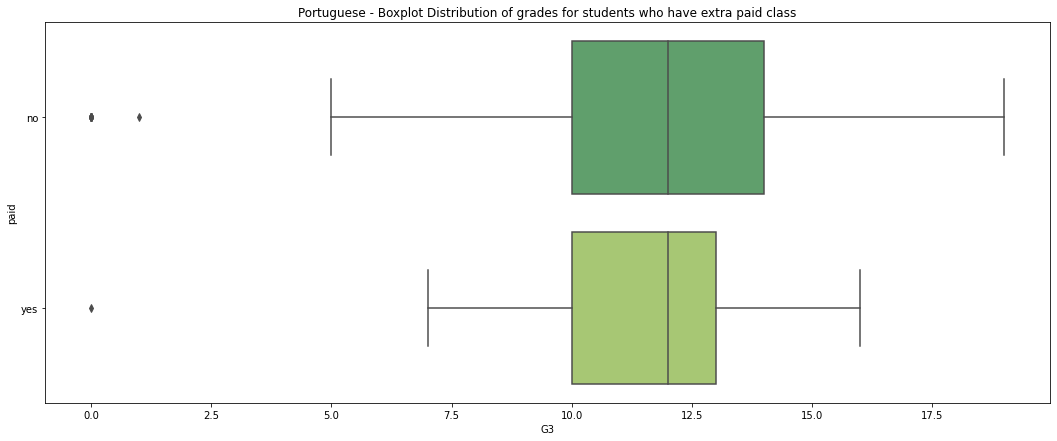

In [27]:
boxPlot(df_mat,['paid','G3'],'Math - Boxplot Distribution of grades for students who have extra paid class')
boxPlot(df_por,['paid','G3'],'Portuguese - Boxplot Distribution of grades for students who have extra paid class')

### Boxplot Distribution of absences for students who have extra paid class

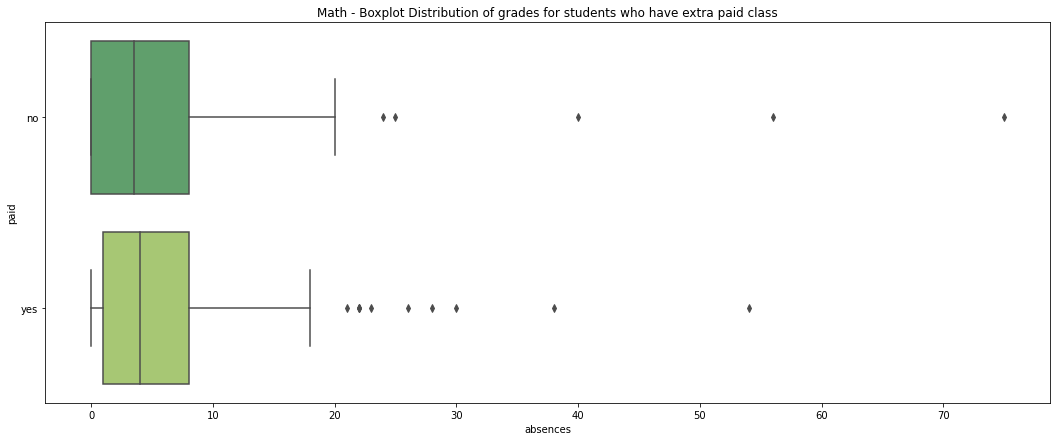

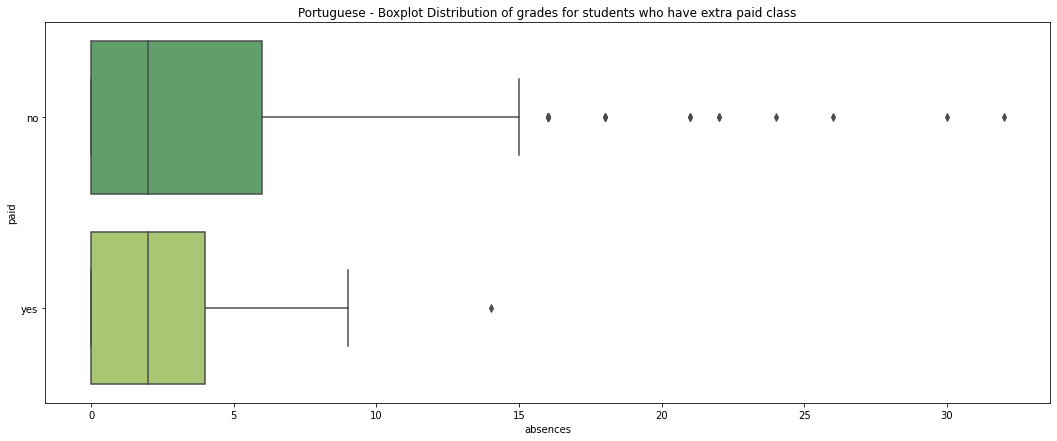

In [28]:
boxPlot(df_mat,['paid','absences'],'Math - Boxplot Distribution of absences for students who have extra paid class')
boxPlot(df_por,['paid','absences'],'Portuguese - Boxplot Distribution of absences for students who have extra paid class')

### How many students wants to get higher education ?

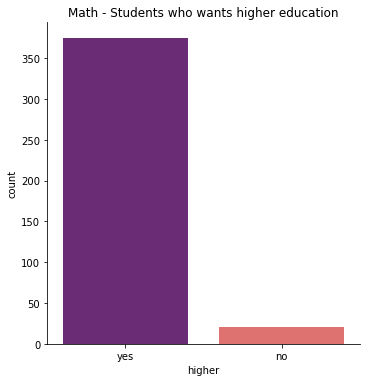

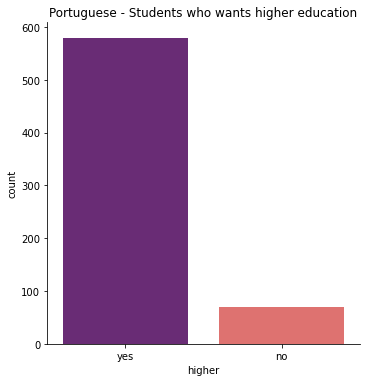

In [29]:
catPlot(df_mat,"higher","Math - Students who wants higher education")
catPlot(df_por,"higher","Portuguese - Students who wants higher education")

### Distribution of grades of students who wants higher education

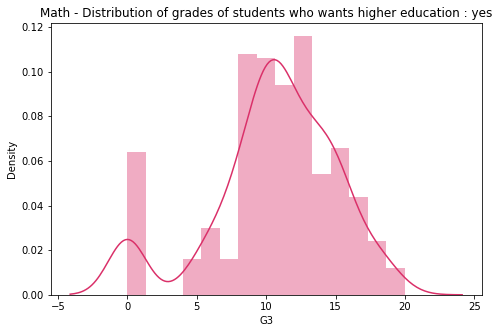

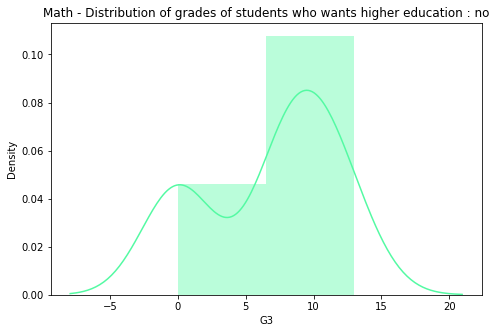

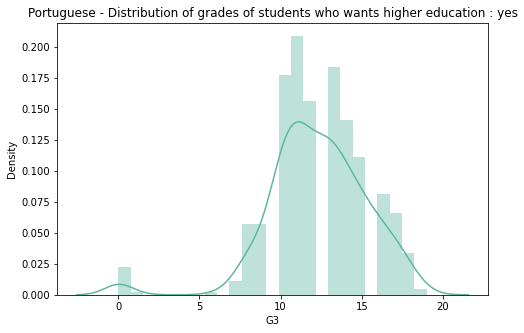

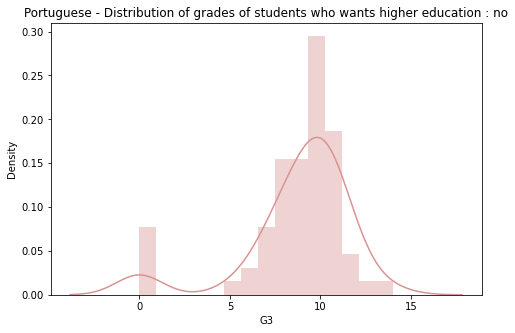

In [30]:
distPlot(df_mat,["higher","G3"],"Math - Distribution of grades of students who wants higher education : ")
distPlot(df_por,["higher","G3"],"Portuguese - Distribution of grades of students who wants higher education : ")

### Boxplot Distribution of grades of students who wants higher education

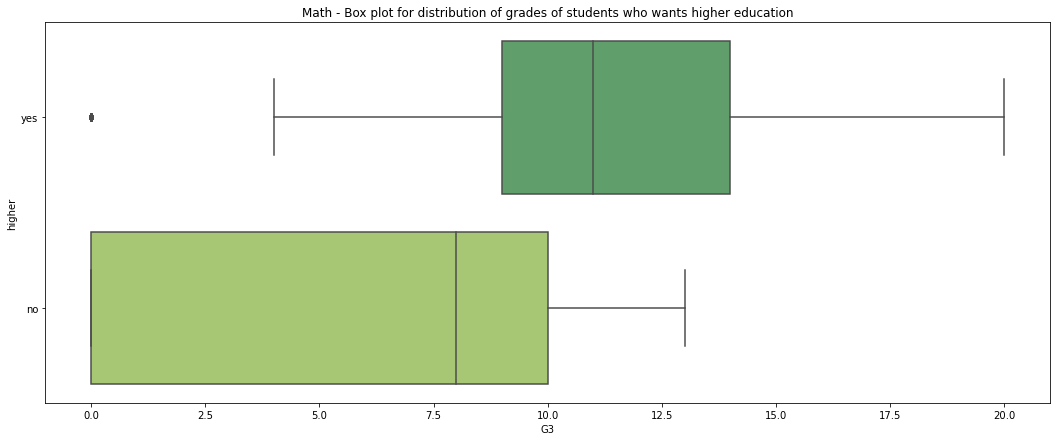

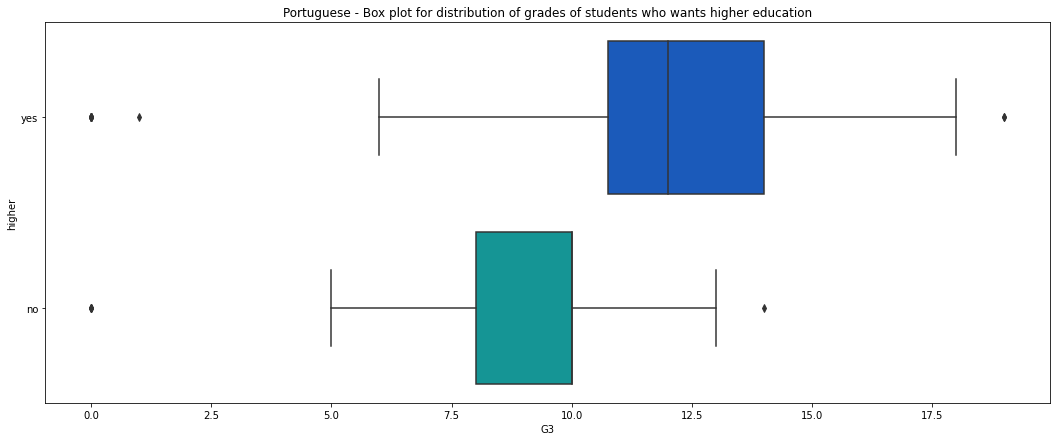

In [31]:
boxPlot(df_mat,['higher','G3'],'Math - Box plot for distribution of grades of students who wants higher education')
boxPlot(df_por,['higher','G3'],'Portuguese - Box plot for distribution of grades of students who wants higher education')

### How many students have access to internet ?

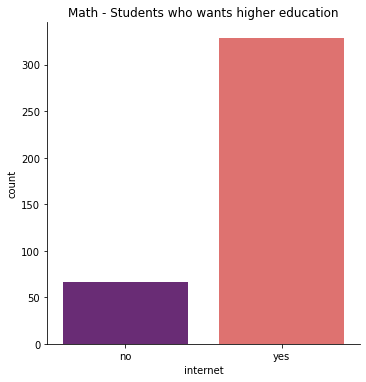

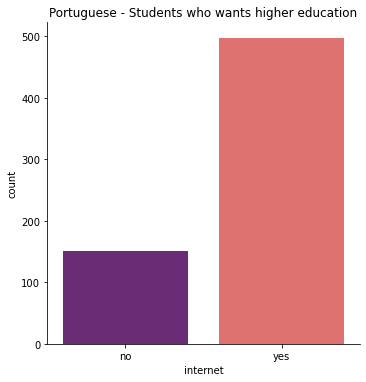

In [32]:
catPlot(df_mat,"internet","Math - Students who wants higher education")
catPlot(df_por,"internet","Portuguese - Students who wants higher education")

### Distribution of grades of students have access to internet

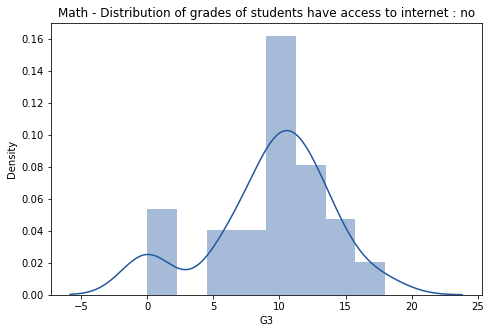

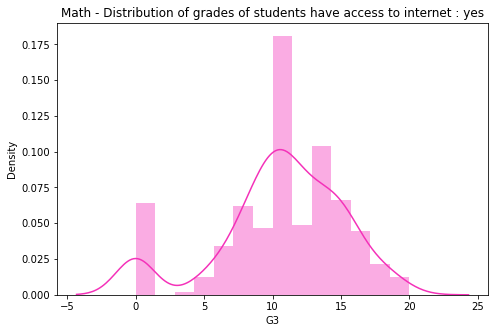

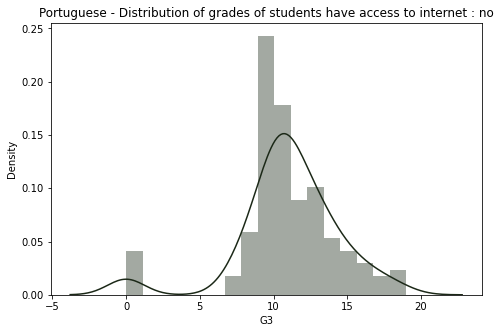

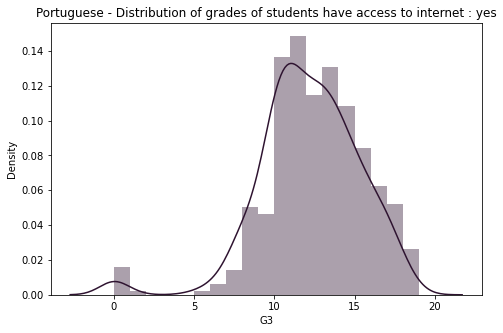

In [33]:
distPlot(df_mat,["internet","G3"],"Math - Distribution of grades of students have access to internet : ")
distPlot(df_por,["internet","G3"],"Portuguese - Distribution of grades of students have access to internet : ")

### Box plot for distribution of grades of students who have access to internet

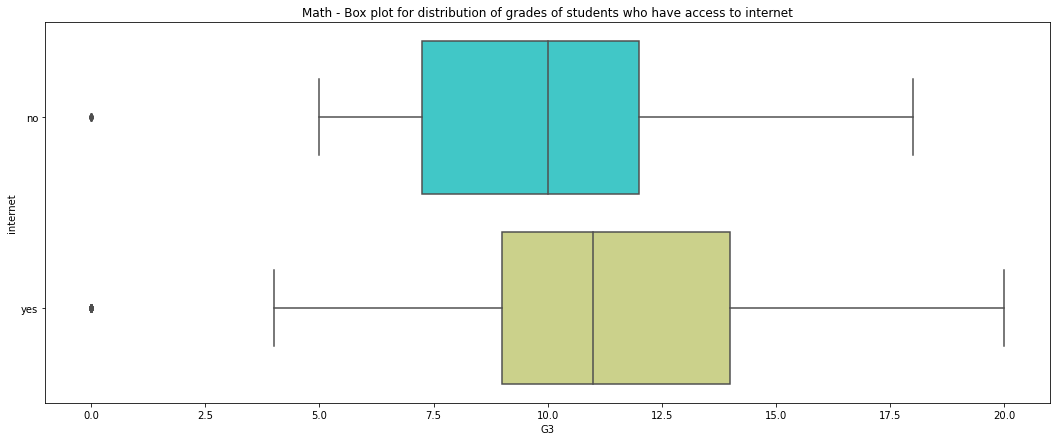

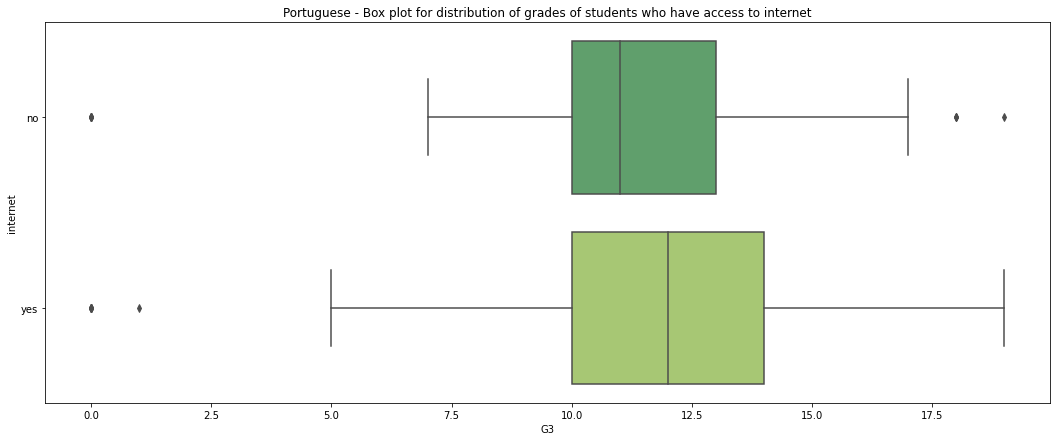

In [34]:
boxPlot(df_mat,['internet','G3'],'Math - Box plot for distribution of grades of students who have access to internet')
boxPlot(df_por,['internet','G3'],'Portuguese - Box plot for distribution of grades of students who have access to internet')

### Family size and parent's cohabitation status

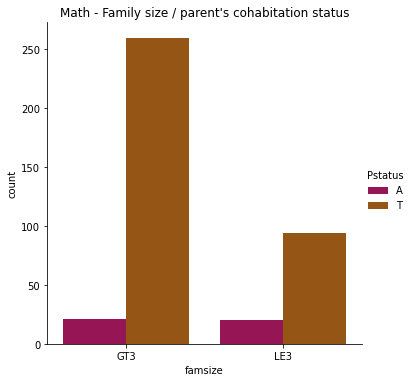

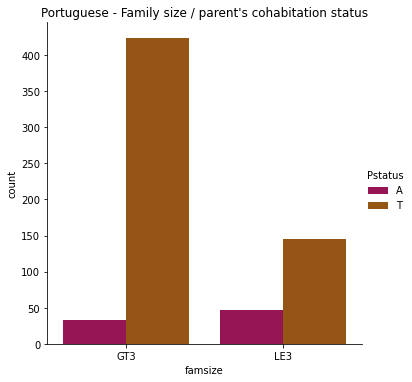

In [35]:
catPlotHue(df_mat,['famsize','Pstatus'],"Math - Family size / parent's cohabitation status")
catPlotHue(df_por,['famsize','Pstatus'],"Portuguese - Family size / parent's cohabitation status")

### Mother's job

In [36]:
catPie1to5(df_mat,"Mjob","Mother's job")
catPie1to5(df_por,"Mjob","Mother's job")

### Father's job

In [37]:
catPie1to5(df_mat,"Fjob","Math - Father's job")
catPie1to5(df_por,"Fjob","Portuguese - Father's job")

### Box plot for distribution of grades of students depending on mother's job

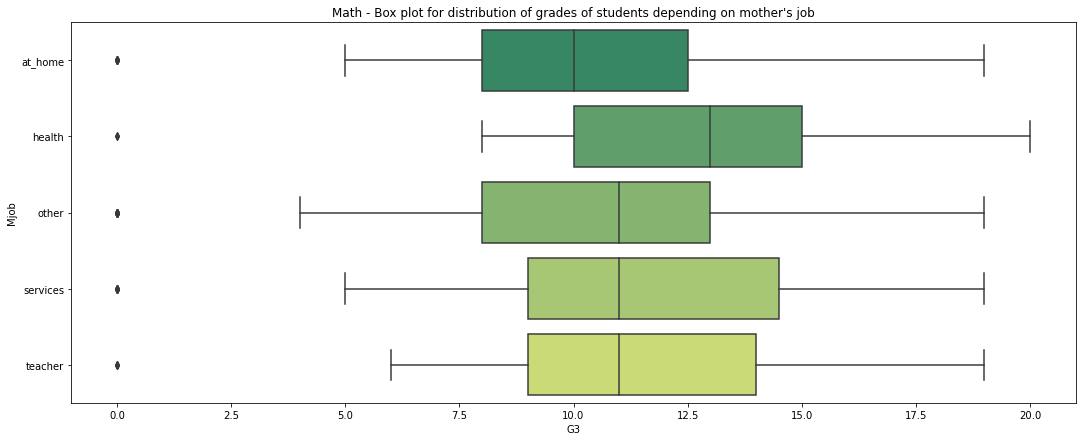

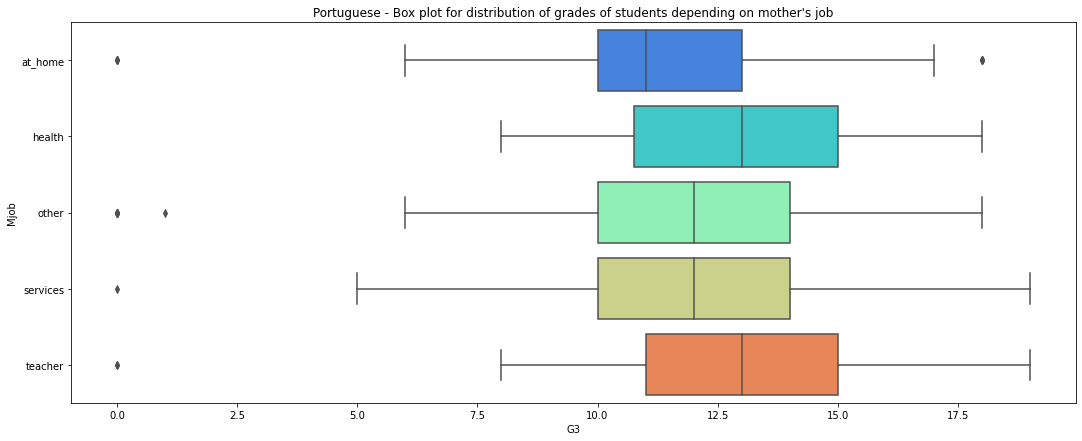

In [38]:
boxPlot(df_mat,['Mjob','G3'],"Math - Box plot for distribution of grades of students depending on mother's job")
boxPlot(df_por,['Mjob','G3'],"Portuguese - Box plot for distribution of grades of students depending on mother's job")

### Box plot for distribution of grades of students depending on father's job

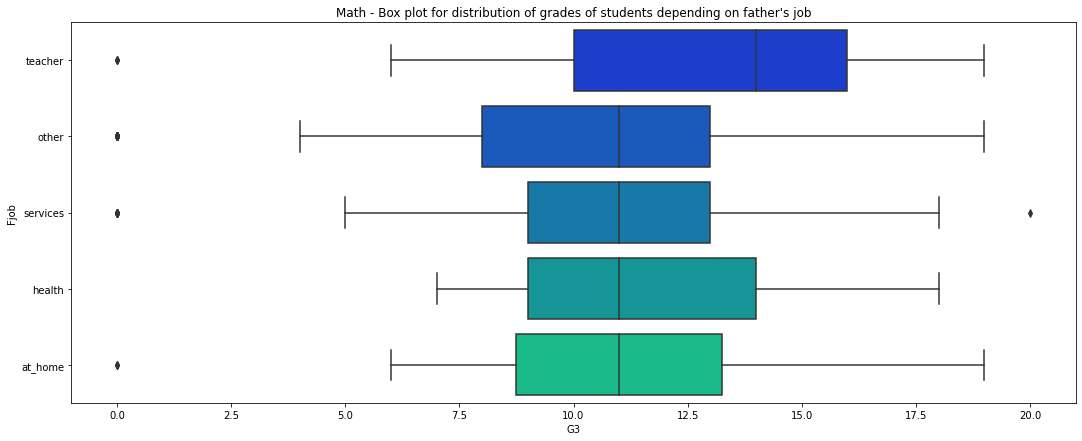

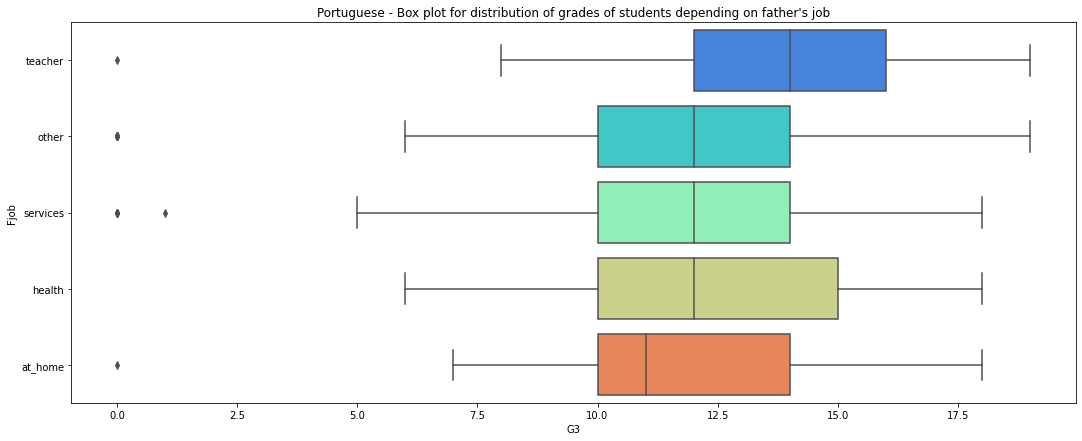

In [39]:
boxPlot(df_mat,['Fjob','G3'],"Math - Box plot for distribution of grades of students depending on father's job")
boxPlot(df_por,['Fjob','G3'],"Portuguese - Box plot for distribution of grades of students depending on father's job")

### Quality family relationship

In [40]:
catPie1to5(df_mat,"famrel","Math - Quality family relationship")
catPie1to5(df_por,"famrel","Portuguese - Quality family relationship")

### Box plot for distribution of grades of students depending on quality family relationships

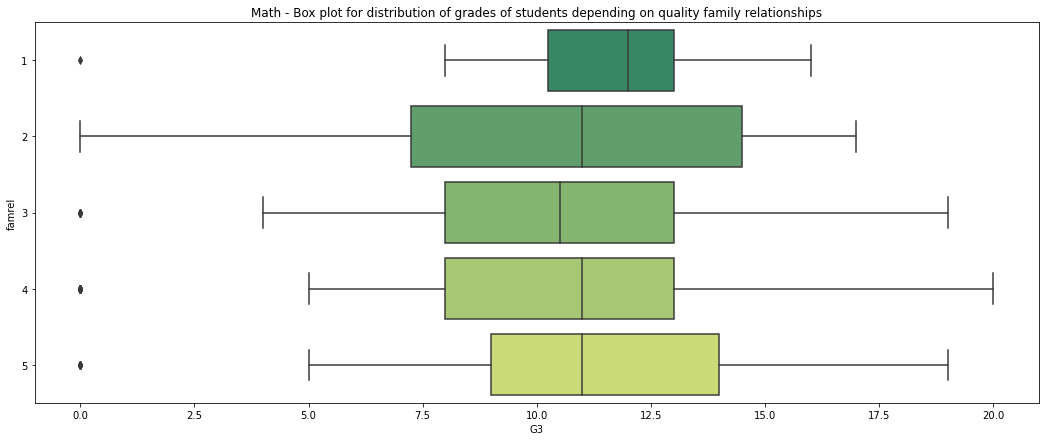

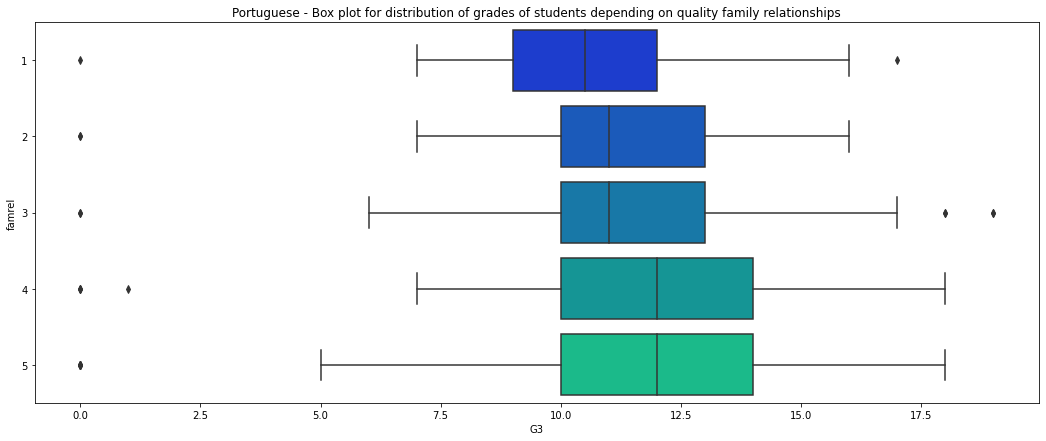

In [41]:
boxPlot(df_mat,['famrel','G3'],"Math - Box plot for distribution of grades of students depending on quality family relationships")
boxPlot(df_por,['famrel','G3'],"Portuguese - Box plot for distribution of grades of students depending on quality family relationships")

## Imports and Functions

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score,classification_report,recall_score,precision_score,classification_report, balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

def preprocessData(targetField,Course,numberOfVariables):
    if(Course=="Math"):
        df = pd.read_csv("student-mat.csv", sep=None,engine='python')
    elif(Course =="Portuguese"):
        df = pd.read_csv("student-por.csv", sep=None,engine='python')
    df['finalResult'] = df['G3'] > 9
    df['academicGrade'] = pd.cut(df.G3,bins=[-1,9,11,13,15,20],labels=['E','D','C','B','A'])
    # Take target field into Y
    Y = df[targetField]
        # Map binary 
    df['schoolsup'] = df['schoolsup'].map({'yes':1, 'no':0})
    df['famsup'] = df['famsup'].map({'yes':1, 'no':0})
    df['paid'] = df['paid'].map({'yes':1, 'no':0})
    df['activities'] = df['activities'].map({'yes':1, 'no':0})
    df['nursery'] = df['nursery'].map({'yes':1, 'no':0})
    df['higher'] = df['higher'].map({'yes':1, 'no':0})
    df['internet'] = df['internet'].map({'yes':1, 'no':0})
    df['romantic'] = df['romantic'].map({'yes':1, 'no':0})

    # Map binary 2
    df['famsize'] = df['famsize'].map({'GT3':1, 'LE3':0})
    df['finalResult'] = df['finalResult'].map({True:1, False:0})
    df['Pstatus'] = df['Pstatus'].map({'T':1, 'A':0})
    try:
        X = df.drop(['finalResult','academicGrade','G3'],axis=1)
    except:
        print("Fields already droped")
    if(numberOfVariables==31):
        X = X.drop(['G2'],axis=1)
    if(numberOfVariables==30):
        X = X.drop(['G2','G1'],axis=1)
    X = pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = .33, random_state=0)
    st_scale = StandardScaler()
    X_train = st_scale.fit_transform(X_train)
    X_test = st_scale.transform(X_test)
    return X_train,y_train,X_test,y_test

def compareScores(allScores):
    print("\n",pd.DataFrame(allScores,\
                columns=["Accuracy", "Recall","Precision"],\
                index=["KNN","SVM","LDA","Logistic Regression","Decision Tree","Voting","Random Forest","Gradient Boosting","AdaBoost"] ), "\n")

def compareScoresReg(allScores):
    print("\n",pd.DataFrame(allScores,\
                columns=["mean squared error", "R2 score"],\
                index=["Linear regression","KNN Reg","Decision Tree Reg"] ), "\n")

def returnScores(y_test,y_pred):
    try:
        return [accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),precision_score(y_test, y_pred)]
    except:
        return [accuracy_score(y_test, y_pred),recall_score(y_test, y_pred,average='micro'),precision_score(y_test, y_pred,average='micro')]
    
def printMetricsAndMatrixForDecisionTreeReg(y_test,y_pred):
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    print ("\n",confusion_matrix,"\n")
    # The mean squared error
    meanSquared = mean_squared_error(y_test, y_pred)
    r2Score = r2_score(y_test, y_pred)
    print('Mean squared error: %.2f'% meanSquared)
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'% r2Score)
    return [meanSquared,r2Score]
    
def printMetricsAndMatrix(y_test,y_pred):
    try:
        confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
        print ("\n",confusion_matrix,"\n")
        print("Accuracy score : "+str(accuracy_score(y_test, y_pred)))
        print("Recall score : "+str(recall_score(y_test, y_pred,average='micro')))
        print("Precision score : "+str(precision_score(y_test, y_pred,average='micro')),"\n")
        print(classification_report(y_test, y_pred))
    except:
        # The mean squared error
        meanSquared = mean_squared_error(y_test, y_pred)
        r2Score = r2_score(y_test, y_pred)
        print('Mean squared error: %.2f'% meanSquared)
        # The coefficient of determination: 1 is perfect prediction
        print('Coefficient of determination: %.2f'% r2Score)
        return [meanSquared,r2Score]
    
def printBest(grid):
    print("Best score : "+str(grid.best_score_))
    print("Best params : "+str(grid.best_params_))
    print("Best estimator : "+str(grid.best_estimator_))
    
def knnClassifier(X_train,y_train,X_test):
    ## Euclidian distance
    knn = KNeighborsClassifier(metric='minkowski', p=2)
    # doing 10 fold staratified-shuffle-split cross validation
    cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)
    accuracies = cross_val_score(knn, X_train,y_train, cv = cv, scoring='accuracy')
    print ("Cross-Validation accuracy scores : "+str(accuracies))
    print ("Mean Cross-Validation accuracy score : "+str(round(accuracies.mean(),3)),"\n")
    #using gridsearchCV to find best parameters for KNN
    ## trying out multiple values for k
    k_range = range(1,31)
    weights_options=['uniform','distance']
    param = {'n_neighbors':k_range, 'weights':weights_options}
    ## Using startifiedShufflesplit. 
    cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
    # estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
    grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
    ## Fitting the model. 
    grid.fit(X_train,y_train)
    printBest(grid)
    ### Using the best parameters from the grid-search.
    knn_grid= grid.best_estimator_
    print("\n","Score of best etimator : "+str(knn_grid.score(X_train,y_train)))
    y_pred = grid.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred),grid

def knnRegClassifier(X_train,y_train,X_test):
    ## Euclidian distance
    knn = KNeighborsRegressor(n_neighbors=4)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    return printMetricsAndMatrix(y_test,y_pred)
    
def svmClassifier(X_train,y_train,X_test):
    Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10] ## penalty parameter C for the error term. 
    gammas = [0.0001,0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
    grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
    grid_search.fit(X_train,y_train)
    printBest(grid_search)
    svm_grid = grid_search.best_estimator_
    print("\n","Score of best etimator : "+str(svm_grid.score(X_train,y_train)))
    y_pred = grid_search.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred),grid_search

def ldaClassifier(X_train,y_train,X_test):
    sklearn_lda = LDA(n_components=1)
    X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
    y_pred = sklearn_lda.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred),sklearn_lda
    
def logisticRegressionClassifier(X_train,y_train,X_test):
    logreg = LogisticRegression(solver='liblinear',penalty= 'l1',random_state = 42)
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred),logreg

def linearRegressionClassifier(X_train,y_train,X_test):
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_test)
    return printMetricsAndMatrix(y_test,y_pred)
    print('Coefficients: '+ str(linreg.coef_))
#     return returnScores(y_test,y_pred)
    
def decisionTreeClassifier(X_train,y_train,X_test):
    max_depth = range(1,30)
    max_feature = [21,22,23,24,25,26,28,29,30,'auto']
    criterion=["entropy", "gini"]
    param = {'max_depth':max_depth, 
             'max_features':max_feature, 
             'criterion': criterion}
    grid_DT = GridSearchCV(DecisionTreeClassifier(), 
                                    param_grid = param, 
                                     verbose=False, 
                                     cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                    n_jobs = -1)
    grid_DT.fit(X_train, y_train) 
    printBest(grid_DT)
    dectree_grid = grid_DT.best_estimator_
    print("\n","Score of best etimator : "+str(dectree_grid.score(X_train,y_train)))
    y_pred = grid_DT.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred),grid_DT

def decisionTreeReg(X_train,y_train,X_test):
    grid_DT = DecisionTreeRegressor(random_state=0)
    grid_DT.fit(X_train, y_train) 
    y_pred = grid_DT.predict(X_test)
    return printMetricsAndMatrixForDecisionTreeReg(y_test,y_pred)

def votingClassifier(X_train,y_train,X_test):
    voting_classifier = VotingClassifier(estimators=[
        ('Knn', grid),
        ('svc', grid_search),
        ('linear_discrement', sklearn_lda),
        ('logreg', logreg),
        ('decisionT_classifier', grid_DT)
    ],voting='hard')
    voting_classifier = voting_classifier.fit(X_train,y_train)
    y_pred = voting_classifier.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred)
    
def randomForestClassifier(X_train,y_train,X_test):
    n_estimators = [140,145,150,155,160];
    max_depth = range(1,10);
    criterions = ['gini', 'entropy'];
    cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
    parameters = {'n_estimators':n_estimators,
                  'max_depth':max_depth,
                  'criterion': criterions}
    grid_RF = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                     param_grid=parameters,
                                     cv=cv,
                                     n_jobs = -1)
    grid_RF.fit(X_train,y_train)
    printBest(grid_RF)
    dectree_grid = grid_RF.best_estimator_
    print("\n","Score of best etimator : "+str(dectree_grid.score(X_train,y_train)))
    y_pred = grid_RF.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred)

def gradientBoostingClassifier(X_train,y_train,X_test):
    gradient_boost = GradientBoostingClassifier()
    gradient_boost.fit(X_train, y_train)
    y_pred = gradient_boost.predict(X_test)
    y_pred = gradient_boost.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred)

def adaBoostClassifier(X_train,y_train,X_test):
    n_estimators = [100,140,145,150,160, 170,175,180,185];
    cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
    learning_r = [0.1,1,0.01,0.5]
    parameters = {'n_estimators':n_estimators, 'learning_rate':learning_r}
    ## If base_estimator = None, then the base estimator is a decision tree.
    grid_AD = GridSearchCV(AdaBoostClassifier(base_estimator= None),param_grid=parameters,cv=cv,n_jobs = -1)
    grid_AD.fit(X_train,y_train)
    y_pred = grid_AD.predict(X_test)
    printMetricsAndMatrix(y_test,y_pred)
    return returnScores(y_test,y_pred)

## ~~ Global variables

In [43]:
# course = "Math"
course = "Portuguese"
numberOfVariables=30

## 5- Binary classification on the variable "finalResult"

### - set target field

In [44]:
targetField = "finalResult"

## 5.1- Preprocessing data

In [45]:
X_train,y_train,X_test,y_test = preprocessData(targetField,course,numberOfVariables)

## 5.2- k-NN classifier

In [46]:
knnScores,grid = knnClassifier(X_train,y_train,X_test)

Cross-Validation accuracy scores : [0.83486239 0.85321101 0.82568807 0.85321101 0.81651376 0.83486239
 0.8440367  0.82568807 0.8440367  0.82568807]
Mean Cross-Validation accuracy score : 0.836 

Best score : 0.850381679389313
Best params : {'n_neighbors': 30, 'weights': 'uniform'}
Best estimator : KNeighborsClassifier(n_neighbors=30)

 Score of best etimator : 0.847926267281106

 Predicted  False  True 
Actual                 
False          1     32
True           0    182 

Accuracy score : 0.8511627906976744
Recall score : 0.8511627906976744
Precision score : 0.8511627906976744 

              precision    recall  f1-score   support

       False       1.00      0.03      0.06        33
        True       0.85      1.00      0.92       182

    accuracy                           0.85       215
   macro avg       0.93      0.52      0.49       215
weighted avg       0.87      0.85      0.79       215



## 5.3- Support Vector Machine classifier

In [47]:
svmScores,grid_search = svmClassifier(X_train,y_train,X_test)

Best score : 0.8587786259541984
Best params : {'C': 2.5, 'gamma': 0.01}
Best estimator : SVC(C=2.5, gamma=0.01, probability=True)

 Score of best etimator : 0.9262672811059908

 Predicted  False  True 
Actual                 
False          6     27
True           5    177 

Accuracy score : 0.8511627906976744
Recall score : 0.8511627906976744
Precision score : 0.8511627906976744 

              precision    recall  f1-score   support

       False       0.55      0.18      0.27        33
        True       0.87      0.97      0.92       182

    accuracy                           0.85       215
   macro avg       0.71      0.58      0.59       215
weighted avg       0.82      0.85      0.82       215



## 5.4- Linear Discriminant Analysis classifier

In [48]:
ldaScores,sklearn_lda = ldaClassifier(X_train,y_train,X_test)


 Predicted  False  True 
Actual                 
False         10     23
True          11    171 

Accuracy score : 0.8418604651162791
Recall score : 0.8418604651162791
Precision score : 0.8418604651162791 

              precision    recall  f1-score   support

       False       0.48      0.30      0.37        33
        True       0.88      0.94      0.91       182

    accuracy                           0.84       215
   macro avg       0.68      0.62      0.64       215
weighted avg       0.82      0.84      0.83       215



## 5.5- Logistic Regression classifier

In [49]:
logisticRegressionScores,logreg = logisticRegressionClassifier(X_train,y_train,X_test)


 Predicted  False  True 
Actual                 
False          8     25
True           7    175 

Accuracy score : 0.8511627906976744
Recall score : 0.8511627906976744
Precision score : 0.8511627906976744 

              precision    recall  f1-score   support

       False       0.53      0.24      0.33        33
        True       0.88      0.96      0.92       182

    accuracy                           0.85       215
   macro avg       0.70      0.60      0.62       215
weighted avg       0.82      0.85      0.83       215



## 5.6- Decision Tree classifier

In [50]:
decisionTreeScores,grid_DT = decisionTreeClassifier(X_train,y_train,X_test)

Best score : 0.8707792207792208
Best params : {'criterion': 'gini', 'max_depth': 3, 'max_features': 23}
Best estimator : DecisionTreeClassifier(max_depth=3, max_features=23)

 Score of best etimator : 0.8778801843317973

 Predicted  False  True 
Actual                 
False         12     21
True           6    176 

Accuracy score : 0.8744186046511628
Recall score : 0.8744186046511628
Precision score : 0.8744186046511628 

              precision    recall  f1-score   support

       False       0.67      0.36      0.47        33
        True       0.89      0.97      0.93       182

    accuracy                           0.87       215
   macro avg       0.78      0.67      0.70       215
weighted avg       0.86      0.87      0.86       215



## 5.7- Voting classifier

In [51]:
votingScores = votingClassifier(X_train,y_train,X_test)


 Predicted  False  True 
Actual                 
False          6     27
True           6    176 

Accuracy score : 0.8465116279069768
Recall score : 0.8465116279069768
Precision score : 0.8465116279069768 

              precision    recall  f1-score   support

       False       0.50      0.18      0.27        33
        True       0.87      0.97      0.91       182

    accuracy                           0.85       215
   macro avg       0.68      0.57      0.59       215
weighted avg       0.81      0.85      0.81       215



## 5.8- Random Forest classifier

In [52]:
randomForestScores = randomForestClassifier(X_train,y_train,X_test)

Best score : 0.8526717557251908
Best params : {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 150}
Best estimator : RandomForestClassifier(max_depth=7, n_estimators=150)

 Score of best etimator : 0.9631336405529954

 Predicted  False  True 
Actual                 
False          4     29
True           4    178 

Accuracy score : 0.8465116279069768
Recall score : 0.8465116279069768
Precision score : 0.8465116279069768 

              precision    recall  f1-score   support

       False       0.50      0.12      0.20        33
        True       0.86      0.98      0.92       182

    accuracy                           0.85       215
   macro avg       0.68      0.55      0.56       215
weighted avg       0.80      0.85      0.80       215



## 5.9- Gradient Boosting classifier

In [53]:
gradientBoostingScores = gradientBoostingClassifier(X_train,y_train,X_test)


 Predicted  False  True 
Actual                 
False         10     23
True           4    178 

Accuracy score : 0.8744186046511628
Recall score : 0.8744186046511628
Precision score : 0.8744186046511628 

              precision    recall  f1-score   support

       False       0.71      0.30      0.43        33
        True       0.89      0.98      0.93       182

    accuracy                           0.87       215
   macro avg       0.80      0.64      0.68       215
weighted avg       0.86      0.87      0.85       215



## 5.10-  AdaBoost classifier

In [54]:
adaBoostScores = adaBoostClassifier(X_train,y_train,X_test)


 Predicted  False  True 
Actual                 
False          5     28
True           5    177 

Accuracy score : 0.8465116279069768
Recall score : 0.8465116279069768
Precision score : 0.8465116279069768 

              precision    recall  f1-score   support

       False       0.50      0.15      0.23        33
        True       0.86      0.97      0.91       182

    accuracy                           0.85       215
   macro avg       0.68      0.56      0.57       215
weighted avg       0.81      0.85      0.81       215



## 5.11- Comparison

In [55]:
allScores = [knnScores,svmScores,ldaScores,logisticRegressionScores,
             decisionTreeScores,votingScores,randomForestScores,gradientBoostingScores,adaBoostScores]
compareScores(allScores)


                      Accuracy    Recall  Precision
KNN                  0.851163  1.000000   0.850467
SVM                  0.851163  0.972527   0.867647
LDA                  0.841860  0.939560   0.881443
Logistic Regression  0.851163  0.961538   0.875000
Decision Tree        0.874419  0.967033   0.893401
Voting               0.846512  0.967033   0.866995
Random Forest        0.846512  0.978022   0.859903
Gradient Boosting    0.874419  0.978022   0.885572
AdaBoost             0.846512  0.972527   0.863415 



## 6- Multivariate classification on the variable "academicGrade"

### - set target field

In [56]:
targetField = "academicGrade"

## 6.1- Preprocessing data

In [57]:
X_train,y_train,X_test,y_test = preprocessData(targetField,course,numberOfVariables)

## 6.2- k-NN classifier

In [58]:
knnScores,grid = knnClassifier(X_train,y_train,X_test)

Cross-Validation accuracy scores : [0.25688073 0.32110092 0.27522936 0.26605505 0.29357798 0.31192661
 0.29357798 0.22018349 0.26605505 0.24770642]
Mean Cross-Validation accuracy score : 0.275 

Best score : 0.333587786259542
Best params : {'n_neighbors': 15, 'weights': 'distance'}
Best estimator : KNeighborsClassifier(n_neighbors=15, weights='distance')

 Score of best etimator : 1.0

 Predicted  A   B   C   D  E
Actual                     
E          4   2   2  18  7
D          4   9  17  29  3
C          9   8  26  14  0
B          4   4  16  10  2
A          6  10   4   7  0 

Accuracy score : 0.33488372093023255
Recall score : 0.33488372093023255
Precision score : 0.33488372093023255 

              precision    recall  f1-score   support

           A       0.22      0.22      0.22        27
           B       0.12      0.11      0.12        36
           C       0.40      0.46      0.43        57
           D       0.37      0.47      0.41        62
           E       0.58      

## 6.3- Support Vector Machine classifier

In [59]:
svmScores,grid_search = svmClassifier(X_train,y_train,X_test)

Best score : 0.35648854961832066
Best params : {'C': 1, 'gamma': 0.01}
Best estimator : SVC(C=1, gamma=0.01, probability=True)

 Score of best etimator : 0.5714285714285714

 Predicted  A   B   C   D  E
Actual                     
E          2   0   2  26  3
D          0   7   9  41  5
C          0  11  21  25  0
B          1   6  16  13  0
A          2   9  10   6  0 

Accuracy score : 0.3395348837209302
Recall score : 0.3395348837209302
Precision score : 0.3395348837209302 

              precision    recall  f1-score   support

           A       0.40      0.07      0.12        27
           B       0.18      0.17      0.17        36
           C       0.36      0.37      0.37        57
           D       0.37      0.66      0.47        62
           E       0.38      0.09      0.15        33

    accuracy                           0.34       215
   macro avg       0.34      0.27      0.26       215
weighted avg       0.34      0.34      0.30       215



## 6.4- Linear Discriminant Analysis classifier

In [60]:
ldaScores,sklearn_lda = ldaClassifier(X_train,y_train,X_test)


 Predicted  A   B   C   D   E
Actual                      
E          4   0   4  13  12
D          2   8  11  29  12
C          2  14  19  20   2
B          4   8  15   9   0
A          7  10   6   4   0 

Accuracy score : 0.3488372093023256
Recall score : 0.3488372093023256
Precision score : 0.3488372093023256 

              precision    recall  f1-score   support

           A       0.37      0.26      0.30        27
           B       0.20      0.22      0.21        36
           C       0.35      0.33      0.34        57
           D       0.39      0.47      0.42        62
           E       0.46      0.36      0.41        33

    accuracy                           0.35       215
   macro avg       0.35      0.33      0.34       215
weighted avg       0.35      0.35      0.35       215



## 6.5- Logistic Regression classifier

In [61]:
logisticRegressionScores,logreg = logisticRegressionClassifier(X_train,y_train,X_test)


 Predicted  A   B   C   D   E
Actual                      
E          4   0   4  15  10
D          2   8   8  34  10
C          1  12  20  21   3
B          5   6  15  10   0
A          6  11   7   3   0 

Accuracy score : 0.35348837209302325
Recall score : 0.35348837209302325
Precision score : 0.35348837209302325 

              precision    recall  f1-score   support

           A       0.33      0.22      0.27        27
           B       0.16      0.17      0.16        36
           C       0.37      0.35      0.36        57
           D       0.41      0.55      0.47        62
           E       0.43      0.30      0.36        33

    accuracy                           0.35       215
   macro avg       0.34      0.32      0.32       215
weighted avg       0.35      0.35      0.35       215



## 6.6- Decision Tree classifier

In [62]:
decisionTreeScores,grid_DT = decisionTreeClassifier(X_train,y_train,X_test)

Best score : 0.36839826839826845
Best params : {'criterion': 'entropy', 'max_depth': 8, 'max_features': 26}
Best estimator : DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=26)

 Score of best etimator : 0.7235023041474654

 Predicted  A   B   C   D  E
Actual                     
E          1   4   3  19  6
D          9   8  14  23  8
C          6  13  20  16  2
B          1   7  19   6  3
A          3   8  12   4  0 

Accuracy score : 0.2744186046511628
Recall score : 0.2744186046511628
Precision score : 0.2744186046511628 

              precision    recall  f1-score   support

           A       0.15      0.11      0.13        27
           B       0.17      0.19      0.18        36
           C       0.29      0.35      0.32        57
           D       0.34      0.37      0.35        62
           E       0.32      0.18      0.23        33

    accuracy                           0.27       215
   macro avg       0.25      0.24      0.24       215
weighted avg

## 6.7- Voting classifier

In [63]:
votingScores = votingClassifier(X_train,y_train,X_test)


 Predicted  A   B   C   D   E
Actual                      
E          4   0   2  17  10
D          1   8   8  39   6
C          1  12  22  22   0
B          4   5  16  11   0
A          6  10   7   4   0 

Accuracy score : 0.3813953488372093
Recall score : 0.3813953488372093
Precision score : 0.3813953488372093 

              precision    recall  f1-score   support

           A       0.38      0.22      0.28        27
           B       0.14      0.14      0.14        36
           C       0.40      0.39      0.39        57
           D       0.42      0.63      0.50        62
           E       0.62      0.30      0.41        33

    accuracy                           0.38       215
   macro avg       0.39      0.34      0.34       215
weighted avg       0.39      0.38      0.37       215



## 6.8- Random Forest classifier

In [64]:
randomForestScores = randomForestClassifier(X_train,y_train,X_test)

Best score : 0.3885496183206107
Best params : {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 150}
Best estimator : RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=150)

 Score of best etimator : 0.9170506912442397

 Predicted  A  B   C   D   E
Actual                     
E          1  1   2  19  10
D          2  4   7  43   6
C          3  6  20  28   0
B          2  4  13  17   0
A          3  7   7  10   0 

Accuracy score : 0.37209302325581395
Recall score : 0.37209302325581395
Precision score : 0.37209302325581395 

              precision    recall  f1-score   support

           A       0.27      0.11      0.16        27
           B       0.18      0.11      0.14        36
           C       0.41      0.35      0.38        57
           D       0.37      0.69      0.48        62
           E       0.62      0.30      0.41        33

    accuracy                           0.37       215
   macro avg       0.37      0.31      0.31       215
weighted

## 6.9- Gradient Boosting classifier

In [65]:
gradientBoostingScores = gradientBoostingClassifier(X_train,y_train,X_test)


 Predicted  A   B   C   D   E
Actual                      
E          3   3   3  14  10
D          1   8  15  29   9
C          8  11  23  13   2
B          7   8   8  12   1
A          5  11   6   5   0 

Accuracy score : 0.3488372093023256
Recall score : 0.3488372093023256
Precision score : 0.3488372093023256 

              precision    recall  f1-score   support

           A       0.21      0.19      0.20        27
           B       0.20      0.22      0.21        36
           C       0.42      0.40      0.41        57
           D       0.40      0.47      0.43        62
           E       0.45      0.30      0.36        33

    accuracy                           0.35       215
   macro avg       0.33      0.32      0.32       215
weighted avg       0.35      0.35      0.35       215



## 6.10-  AdaBoost classifier

In [66]:
adaBoostScores = adaBoostClassifier(X_train,y_train,X_test)


 Predicted  A   B   C   D  E
Actual                     
E          0   1   4  20  8
D          0   5  16  38  3
C          6  13  20  18  0
B          1   7  15  13  0
A          5   7   8   7  0 

Accuracy score : 0.3627906976744186
Recall score : 0.3627906976744186
Precision score : 0.3627906976744186 

              precision    recall  f1-score   support

           A       0.42      0.19      0.26        27
           B       0.21      0.19      0.20        36
           C       0.32      0.35      0.33        57
           D       0.40      0.61      0.48        62
           E       0.73      0.24      0.36        33

    accuracy                           0.36       215
   macro avg       0.41      0.32      0.33       215
weighted avg       0.40      0.36      0.35       215



## 6.11- Comparison

In [67]:
allScores = [knnScores,svmScores,ldaScores,logisticRegressionScores,
             decisionTreeScores,votingScores,randomForestScores,gradientBoostingScores,adaBoostScores]
compareScores(allScores)


                      Accuracy    Recall  Precision
KNN                  0.334884  0.334884   0.334884
SVM                  0.339535  0.339535   0.339535
LDA                  0.348837  0.348837   0.348837
Logistic Regression  0.353488  0.353488   0.353488
Decision Tree        0.274419  0.274419   0.274419
Voting               0.381395  0.381395   0.381395
Random Forest        0.372093  0.372093   0.372093
Gradient Boosting    0.348837  0.348837   0.348837
AdaBoost             0.362791  0.362791   0.362791 



## 7- Regression on the variable "G3"

### - set target field

In [68]:
targetField = "G3"

## 7.1- Preprocessing data

In [69]:
X_train,y_train,X_test,y_test = preprocessData(targetField,course,numberOfVariables)

## 7.2- Linear Regression classifier

In [70]:
linRegScores = linearRegressionClassifier(X_train,y_train,X_test)


 Predicted  5.160093   5.456968   6.535093   7.378843   7.394468   7.519468   \
Actual                                                                        
0                  0          0          0          0          0          0   
1                  0          0          0          0          0          0   
5                  1          0          0          0          0          0   
6                  0          0          0          0          0          0   
7                  0          0          0          0          0          0   
8                  0          0          1          0          0          0   
9                  0          0          0          0          0          0   
10                 0          1          0          0          0          1   
11                 0          0          0          1          1          0   
12                 0          0          0          0          0          0   
13                 0          0          0        

## 7.3- k-NN classifier

In [71]:
knnScores = knnRegClassifier(X_train,y_train,X_test)


 Predicted  5.75   6.25   6.75   7.50   8.00   8.75   9.25   9.50   9.75   \
Actual                                                                     
0              0      0      0      0      0      0      0      0      0   
1              0      0      0      0      0      0      0      0      0   
5              0      0      0      0      0      1      0      0      0   
6              0      0      0      0      0      0      0      0      0   
7              0      1      0      0      0      0      1      0      0   
8              0      0      0      1      2      0      0      0      1   
9              0      0      1      0      1      1      1      0      0   
10             0      0      1      0      0      0      2      2      1   
11             0      0      0      0      0      2      0      1      0   
12             0      0      0      0      0      0      0      0      0   
13             0      0      0      0      0      0      1      0      1   
14        

## 7.4- Decision Tree classifier

In [72]:
decisionTreeScores = decisionTreeReg(X_train,y_train,X_test)


 Predicted  0.0   7.0   8.0   9.0   10.0  11.0  12.0  13.0  14.0  15.0  16.0  \
Actual                                                                        
0             0     0     1     0     1     0     0     0     1     0     1   
1             0     0     0     0     1     0     0     0     0     0     0   
5             0     0     1     0     0     0     0     0     0     0     0   
6             0     0     0     0     0     0     0     0     1     0     0   
7             1     0     2     0     0     0     0     0     0     0     0   
8             1     2     3     0     2     3     0     2     0     0     0   
9             0     0     2     2     2     1     1     1     0     0     0   
10            3     2     2     3     3     4     0     3     3     1     2   
11            2     0     3     0     8     1     6     3     2     4     2   
12            0     0     0     0     2     8     5     3     5     2     2   
13            0     0     0     1     4     2     

## 7.5- Comparison

In [73]:
allScores = [linRegScores,knnScores,decisionTreeScores]
compareScoresReg(allScores)


                    mean squared error  R2 score
Linear regression            8.474326  0.170189
KNN Reg                      9.798256  0.040549
Decision Tree Reg           15.967442 -0.563542 



## 8- Conclusion

Le projet exige de produire plusieurs résultats sur plusieurs variable cible (ici toutes basées sur la note G3), mais cela démontre que pour le meme objectif, un modèle peut être meilleure qu'un autre quand au résultat attendu.

En effet, d'une mention binaire de "pass"/"fail" à une mention multiple de A à E, nous constatons que l'approche de l'algorithme Logistic Regression offre un meilleur résultat quand il est question de réponde par "fail" ou "pass" alors que l'approche de l'algorithme Gradient Boosting offre un meilleur résultat quand il est question de multivariable - mention de A à E. Voir le tableau récapitulatif ci dessous. 

Les algorithmes utilisés ont tous une approche différentes mais ce qu'il faut retenir c'est que chacun d'eux a ses forces et faiblesse. Ainsi il faut, dans tout projet, connaitre ses besoins, le nombre de data et leur complexité afin de pouvoir décider quel algorithme utiliser. Cependant l'utilisation de plusieurs algorithmes est aussi une bonne approche afin de déterminer quel en serait le modèle resultant le plus pertinent.

--- Nous prenons ici l'exemple des résultats obtenus avec 32 variables sur la matière des mathématiques:

Binary classification on the variable "finalResult":
                      Accuracy  Recall  Precision
KNN                  0.687023  0.9000   0.685714
SVM                  0.885496  0.9500   0.873563
LDA                  0.870229  0.9250   0.870588
Logistic Regression  0.946565  0.9500   0.962025
Decision Tree        0.870229  0.9125   0.879518
Voting               0.900763  0.9500   0.894118
Random Forest        0.900763  0.9750   0.876404
Gradient Boosting    0.916031  0.9625   0.905882
AdaBoost             0.946565  0.9500   0.962025

=> Best algo based on accuracy : Logistic Regression

Multivariate classification on the variable "academicGrade":
                      Accuracy    Recall  Precision
KNN                  0.412214  0.412214   0.412214
SVM                  0.549618  0.549618   0.549618
LDA                  0.633588  0.633588   0.633588
Logistic Regression  0.618321  0.618321   0.618321
Decision Tree        0.664122  0.664122   0.664122
Voting               0.618321  0.618321   0.618321
Random Forest        0.740458  0.740458   0.740458
Gradient Boosting    0.748092  0.748092   0.748092
AdaBoost             0.442748  0.442748   0.442748 

=> Best algo based on accuracy : Gradient Boosting

Regression on the variable "G3":
                    mean squared error  R2 score
Linear regression            5.564537  0.800767
KNN Reg                     20.185592  0.277275
Decision Tree Reg            8.022901  0.712748

=> Best algo based on MSE : Linear regression



--- Nous prenons ici l'exemple des résultats obtenus avec 30 variables sur le cours de la langue portugaise:

Binary classification on the variable "finalResult":
                      Accuracy    Recall  Precision
KNN                  0.851163  1.000000   0.850467
SVM                  0.851163  0.972527   0.867647
LDA                  0.841860  0.939560   0.881443
Logistic Regression  0.851163  0.961538   0.875000
Decision Tree        0.865116  0.939560   0.904762
Voting               0.846512  0.967033   0.866995
Random Forest        0.851163  0.983516   0.860577
Gradient Boosting    0.874419  0.978022   0.885572
AdaBoost             0.846512  0.972527   0.863415 

Multivariate classification on the variable "academicGrade":
                      Accuracy    Recall  Precision
KNN                  0.334884  0.334884   0.334884
SVM                  0.339535  0.339535   0.339535
LDA                  0.348837  0.348837   0.348837
Logistic Regression  0.353488  0.353488   0.353488
Decision Tree        0.320930  0.320930   0.320930
Voting               0.376744  0.376744   0.376744
Random Forest        0.348837  0.348837   0.348837
Gradient Boosting    0.376744  0.376744   0.376744
AdaBoost             0.362791  0.362791   0.362791 

Regression on the variable "G3":
                    mean squared error  R2 score
Linear regression            8.474326  0.170189
KNN Reg                      9.798256  0.040549
Decision Tree Reg           15.967442 -0.563542 


Tous les résultats des algorithmes se ressemblent dans ce cas puisque les notes G1 et G2 ont été enlevés du dataFrame. On peut en déduire que ces derniers jouaient un role important pour les prédictions.
Ce qui est tout à fait logique en meme temps puisque plus nous avons d'informations plus nous pouvons prédire avec une tolérance d'erreur basse.
Il faut noter que les datasets fournis pour ce projet ne contiennent pas énormément d'entrées (lignes) par rapport aux variables (colonnes).


